# THE SPOTIFY DATA BASE API

**Importing libraries**

In [1]:
import json
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import os
import requests


**Finding the api url**

In [2]:
api_url = f"https://api.spotify.com/v1/"
api_url

'https://api.spotify.com/v1/'

**Autenthication**

In [3]:
#Finding the api-users credential
client_id = "XXXXXXXXX"
client_secret = "XXXXXXX"

In [4]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {'grant_type': 'client_credentials','client_id': client_id,'client_secret': client_secret,})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

#save the headers
headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}



**Find your user Id info**

In [5]:
user_id = "alvaronoriega"

In [6]:

# actual GET request with proper header
User_profile = requests.get(api_url + "users/"+ user_id, headers=headers)
User_profile

<Response [200]>

In [7]:
User_profile = User_profile.json()
User_profile

{'display_name': 'Alvaro Noriega Echevarria',
 'external_urls': {'spotify': 'https://open.spotify.com/user/alvaronoriega'},
 'followers': {'href': None, 'total': 46},
 'href': 'https://api.spotify.com/v1/users/alvaronoriega',
 'id': 'alvaronoriega',
 'images': [{'height': None,
   'url': 'https://scontent-cdt1-1.xx.fbcdn.net/v/t31.0-1/p320x320/15995281_10154387111024372_8689638180703586696_o.jpg?_nc_cat=109&_nc_sid=0c64ff&_nc_ohc=Bm706_0vWuQAX97OmXj&_nc_ht=scontent-cdt1-1.xx&_nc_tp=6&oh=815e479f427e6da85559f2c3a14817de&oe=5F662C49',
   'width': None}],
 'type': 'user',
 'uri': 'spotify:user:alvaronoriega'}

In [8]:
User_profile = pd.json_normalize(User_profile)
User_profile

,display_name,href,id,images,type,uri,external_urls.spotify,followers.href,followers.total
0,Alvaro Noriega Echevarria,https://api.spotify.com/v1/users/alvaronoriega,alvaronoriega,"[{'height': None, 'url': 'https://scontent-cdt...",user,spotify:user:alvaronoriega,https://open.spotify.com/user/alvaronoriega,None,46


**Get all songs from Bon Iver albums and save in a csv** 

In [9]:
artist_id= "4LEiUm1SRbFMgfqnQTwUbQ"

In [10]:

r = requests.get(api_url + 'artists/' + artist_id + '/albums', headers=headers, params={'include_groups': 'album'})
artist = r.json()

In [11]:
for album in artist['items']:
    print(album['name'])

i,i
22, A Million
Bon Iver
Bon Iver
For Emma, Forever Ago
For Emma, Forever Ago


In [12]:
data = []   # will hold all track info
albums = [] # to keep track of duplicates

for album in artist['items']:
    album_name = album['name']
    
    # pull all tracks from this album
    r = requests.get(api_url + 'albums/' + album['id'] + '/tracks', 
        headers=headers)
    tracks = r.json()['items']
    
    for track in tracks:
        # get audio features (key, liveness, danceability, ...)
        f = requests.get(api_url + 'audio-features/' + track['id'], 
            headers=headers)
        f = f.json()
        
        # combine with album info
        f.update({
            'track_name': track['name'],
            'album_name': album_name,
            'release_date': album['release_date'],
            'album_id': album['id']
        })
        
        data.append(f)

In [13]:
df = pd.DataFrame(data)
df.drop_duplicates(subset ="track_name", inplace = True)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,release_date,album_id
0,0.661,0.4070,10,-21.583,0,0.7470,0.730,0.000000,0.8620,0.2770,...,1sgBtdd3OgBABV9L5tM8K8,spotify:track:1sgBtdd3OgBABV9L5tM8K8,https://api.spotify.com/v1/tracks/1sgBtdd3OgBA...,https://api.spotify.com/v1/audio-analysis/1sgB...,31547,4,Yi,"i,i",2019-08-09,54DU59anGQsdrFP7utpshG
1,0.489,0.3960,8,-11.570,1,0.0530,0.889,0.007130,0.2030,0.5230,...,5p2vqFW6PVyE38GJlCVIHv,spotify:track:5p2vqFW6PVyE38GJlCVIHv,https://api.spotify.com/v1/tracks/5p2vqFW6PVyE...,https://api.spotify.com/v1/audio-analysis/5p2v...,196360,4,iMi,"i,i",2019-08-09,54DU59anGQsdrFP7utpshG
2,0.649,0.4240,0,-12.007,0,0.0754,0.908,0.000559,0.2570,0.2920,...,2AXnVe4VcEli1z8B9P1Elk,spotify:track:2AXnVe4VcEli1z8B9P1Elk,https://api.spotify.com/v1/tracks/2AXnVe4VcEli...,https://api.spotify.com/v1/audio-analysis/2AXn...,142880,4,We,"i,i",2019-08-09,54DU59anGQsdrFP7utpshG
3,0.565,0.4130,6,-11.892,1,0.0546,0.955,0.134000,0.1470,0.3140,...,0tP7eRyzsXUkuJK4m6ys7I,spotify:track:0tP7eRyzsXUkuJK4m6ys7I,https://api.spotify.com/v1/tracks/0tP7eRyzsXUk...,https://api.spotify.com/v1/audio-analysis/0tP7...,187533,4,"Holyfields,","i,i",2019-08-09,54DU59anGQsdrFP7utpshG
4,0.411,0.2850,0,-10.970,1,0.0306,0.872,0.000354,0.0993,0.2130,...,0d6bZwEAi1XblGRhnzPfgC,spotify:track:0d6bZwEAi1XblGRhnzPfgC,https://api.spotify.com/v1/tracks/0d6bZwEAi1Xb...,https://api.spotify.com/v1/audio-analysis/0d6b...,216707,4,"Hey, Ma","i,i",2019-08-09,54DU59anGQsdrFP7utpshG
5,0.606,0.2640,6,-10.152,1,0.0243,0.943,0.000056,0.1180,0.3190,...,2a8HLMRc6E0AM4xXiQ4wh6,spotify:track:2a8HLMRc6E0AM4xXiQ4wh6,https://api.spotify.com/v1/tracks/2a8HLMRc6E0A...,https://api.spotify.com/v1/audio-analysis/2a8H...,145720,4,U (Man Like),"i,i",2019-08-09,54DU59anGQsdrFP7utpshG
6,0.370,0.4080,0,-10.355,1,0.0441,0.804,0.027900,0.6780,0.1640,...,1ff60tDWdcdVN6PtKQXWny,spotify:track:1ff60tDWdcdVN6PtKQXWny,https://api.spotify.com/v1/tracks/1ff60tDWdcdV...,https://api.spotify.com/v1/audio-analysis/1ff6...,262267,4,Naeem,"i,i",2019-08-09,54DU59anGQsdrFP7utpshG
7,0.323,0.2420,8,-10.955,1,0.0730,0.979,0.006750,0.0911,0.2610,...,0v3PdoLZrm0RVfS8sHnADp,spotify:track:0v3PdoLZrm0RVfS8sHnADp,https://api.spotify.com/v1/tracks/0v3PdoLZrm0R...,https://api.spotify.com/v1/audio-analysis/0v3P...,150080,3,Jelmore,"i,i",2019-08-09,54DU59anGQsdrFP7utpshG
8,0.453,0.3620,1,-11.154,1,0.0319,0.768,0.014800,0.0998,0.1810,...,5fLZQWarUISdz4attMFTXl,spotify:track:5fLZQWarUISdz4attMFTXl,https://api.spotify.com/v1/tracks/5fLZQWarUISd...,https://api.spotify.com/v1/audio-analysis/5fLZ...,217947,4,Faith,"i,i",2019-08-09,54DU59anGQsdrFP7utpshG
9,0.297,0.0682,3,-13.147,1,0.0377,0.938,0.000030,0.1080,0.2350,...,6eICehJWzcEk2880W6Apif,spotify:track:6eICehJWzcEk2880W6Apif,https://api.spotify.com/v1/tracks/6eICehJWzcEk...,https://api.spotify.com/v1/audio-analysis/6eIC...,141667,3,Marion,"i,i",2019-08-09,54DU59anGQsdrFP7utpshG


In [14]:
df.to_csv('BonIvertracksanalysis.csv')

**Analize Bon Iver albums music features**

In [15]:
#Change the album name to the season
df['album_name'] = df['album_name'].str.replace('For Emma, Forever Ago','Winter')
df['album_name'] = df['album_name'].str.replace('Bon Iver','Spring')
df['album_name'] = df['album_name'].str.replace('22, A Million','Summer')
df['album_name'] = df['album_name'].str.replace('i,i','Fall')

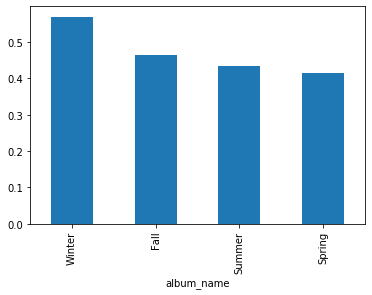

In [16]:
danceabilitybyalbum = df.groupby('album_name').mean()['danceability'].sort_values(ascending=False).head(10)
danceabilitybyalbum.plot(kind='bar')


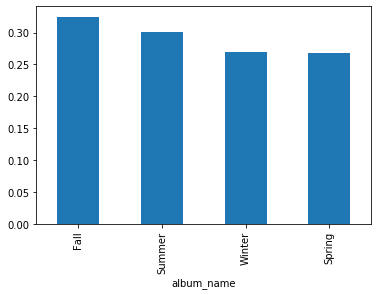

In [17]:
energy = df.groupby('album_name').mean()['energy'].sort_values(ascending=False).head(10)
energy.plot(kind='bar')

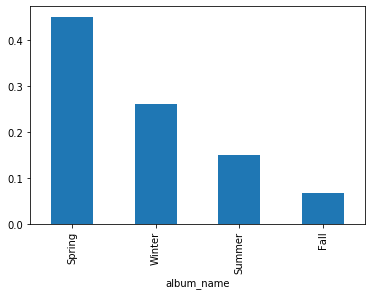

In [18]:
instrumentalness = df.groupby('album_name').mean()['instrumentalness'].sort_values(ascending=False).head(10)
instrumentalness.plot(kind='bar')

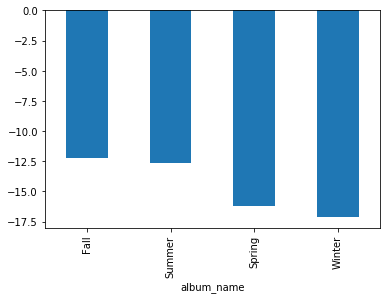

In [19]:
loudness = df.groupby('album_name').mean()['loudness'].sort_values(ascending=False).head(10)
loudness.plot(kind='bar')

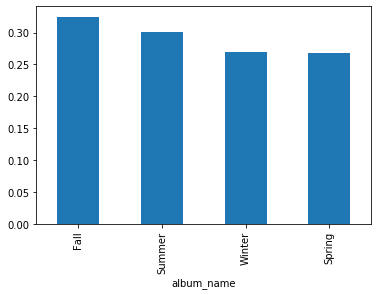

In [20]:
energy = df.groupby('album_name').mean()['energy'].sort_values(ascending=False).head(10)
energy.plot(kind='bar')

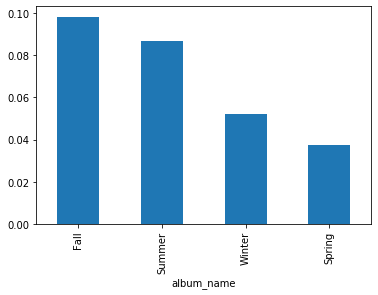

In [21]:
speechiness = df.groupby('album_name').mean()['speechiness'].sort_values(ascending=False).head(10)
speechiness.plot(kind='bar')

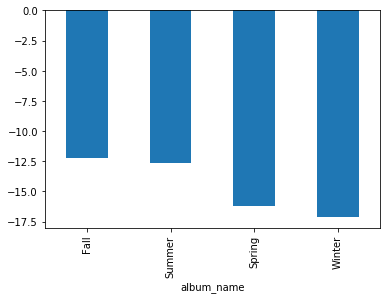

In [22]:
loudness = df.groupby('album_name').mean()['loudness'].sort_values(ascending=False).head(10)
loudness.plot(kind='bar')

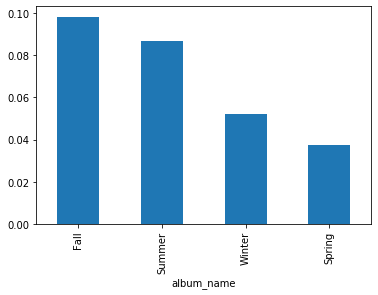

In [23]:
speechiness= df.groupby('album_name').mean()['speechiness'].sort_values(ascending=False).head(10)
speechiness.plot(kind='bar')

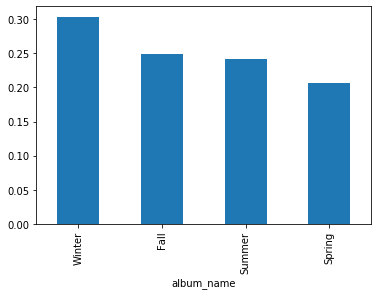

In [24]:
valence= df.groupby('album_name').mean()['valence'].sort_values(ascending=False).head(10)
valence.plot(kind='bar')

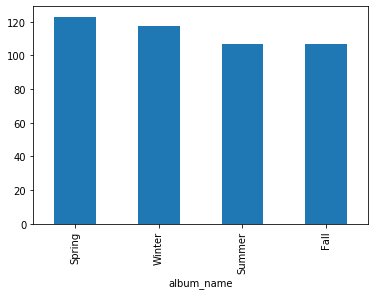

In [25]:
tempo= df.groupby('album_name').mean()['tempo'].sort_values(ascending=False).head(10)
tempo.plot(kind='bar')

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

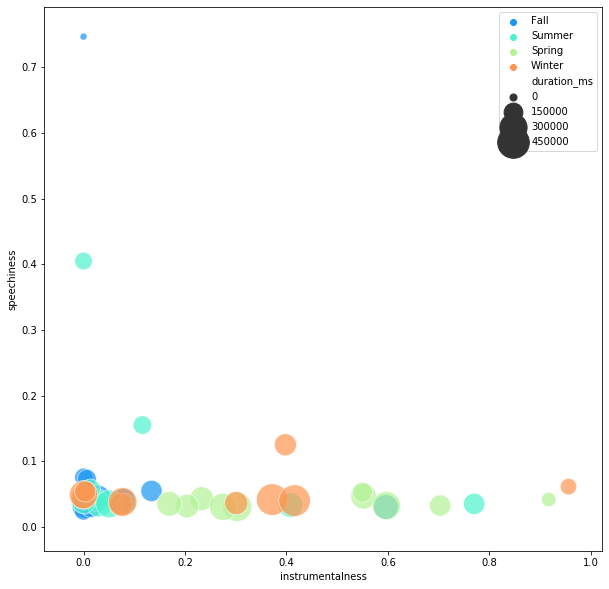

In [27]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df, x='instrumentalness', y='speechiness', 
                     hue='album_name', palette='rainbow', 
                     size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10], labs[1:10], loc='best', title=None)

**Other analysis**

In [28]:
song_id = "5p2vqFW6PVyE38GJlCVIHv" 
r = requests.get(api_url + 'audio-analysis/' + song_id,  headers=headers)
song_id = r.json()

In [29]:
song_id = pd.json_normalize(song_id)
song_id

,bars,beats,sections,segments,tatums,meta.analyzer_version,meta.platform,meta.detailed_status,meta.status_code,meta.timestamp,...,track.mode,track.mode_confidence,track.codestring,track.code_version,track.echoprintstring,track.echoprint_version,track.synchstring,track.synch_version,track.rhythmstring,track.rhythm_version
0,"[{'start': 0.38882, 'duration': 1.8096, 'confi...","[{'start': 0.38882, 'duration': 0.4444, 'confi...","[{'start': 0.0, 'duration': 8.03634, 'confiden...","[{'start': 0.0, 'duration': 0.13302, 'confiden...","[{'start': 0.38882, 'duration': 0.2222, 'confi...",4.0.0,Linux,OK,0,1585479280,...,1,0.628,eJxNmQmS7TYOBK_yjkASXO9_MWeW2mHHTHw3-SQuQKFQgO...,3.15,eJzVnVuy7aiSZbskgXg1ByHofxNqDEVaZtYtE-tjW3xU3j...,4.12,eJyFV1mWazkI24qXYDCe9r-xlgROUud99KnUDXFsEGIwce...,1.0,eJxlmw2SJLkKg69SR7Dx__0v9tAnsmcjXsRO9ExXltPGII...,1.0


In [30]:
#Kahoot song
song_id3 = "5p2vqFW6PVyE38GJlCVIHv" 
r = requests.get(api_url + 'audio-features/' + song_id3,  headers=headers)
song_id3 = r.json()

In [31]:
song_id3 = pd.json_normalize(song_id3)
song_id3

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.489,0.396,8,-11.57,1,0.053,0.889,0.00713,0.203,0.523,134.131,audio_features,5p2vqFW6PVyE38GJlCVIHv,spotify:track:5p2vqFW6PVyE38GJlCVIHv,https://api.spotify.com/v1/tracks/5p2vqFW6PVyE...,https://api.spotify.com/v1/audio-analysis/5p2v...,196360,4
